In [67]:
using DataFrames
using DataFramesMeta
using CSV
using SavitzkyGolay
using Plots
using CurveFit

In [68]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S2_LP.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S5_LP.dat", DataFrame, missingstring="")
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

In [69]:
using Gtk

file_to_load = open_dialog_native("Select Long. Prof. data file", GtkNullContainer(), String[])


"\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2\\Plates\\Logitudinal Plates\\LONG-PM-OS-R1_S3_lp_v2.dat"

In [70]:
using CSV
#df = CSV.File(file_to_load, delim=",", header=1, select=[:Chainage,:var"NS LP"]) |> DataFrame

df = CSV.read(file_to_load
                , DataFrame
                , silencewarnings=true
                , missingstring=["","-999.9000","-9999","-9999.000", "-9999.00", "-9999.0", "N/A"]
                )


Row,Chainage,LP 6 (OS),Column3
,Float64,Float64,Missing
1,0.1,-239.0,missing
2,0.2,-238.7,missing
3,0.3,-238.5,missing
4,0.4,-238.0,missing
5,0.5,-237.3,missing
6,0.6,-236.4,missing
7,0.7,-235.7,missing
8,0.8,-235.2,missing
9,0.9,-234.8,missing


In [71]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Union…,Union…,Union…,Int64,DataType
1,Chainage,5.05,0.1,5.05,10.0,0,Float64
2,LP 6 (OS),-202.12,-239.0,-203.15,-141.4,0,Float64
3,Column3,,,,,100,Missing


In [72]:
using DataFrames
using DataFramesMeta
using Statistics

df = select(df, 1:2)
rename!(df, [:Chainage, :NS])


#transform!(df, [:NS] => ByRow((x) -> x == -999.9 ? mean(df.NS) : x))
#df .= ifelse.(df .== -999.9, "", df)
#df .= ifelse
# minimum_texture = minimum(df.Texture)

#describe(df)

# adjustment_value = abs(minimum_texture)

# #df.adjusted_Tex = df.Texture + adjustment_value
# #df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

# readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
# println("readings per metre ", readings_per_metre)
# hertz = readings_per_metre/2
# println("hertz ", hertz)

Row,Chainage,NS
,Float64,Float64
1,0.1,-239.0
2,0.2,-238.7
3,0.3,-238.5
4,0.4,-238.0
5,0.5,-237.3
6,0.6,-236.4
7,0.7,-235.7
8,0.8,-235.2
9,0.9,-234.8


In [73]:
# this replaces the missing data with the previous value
using Impute
transform!(df, names(df) .=> Impute.locf, renamecols=false)

Row,Chainage,NS
,Float64,Float64
1,0.1,-239.0
2,0.2,-238.7
3,0.3,-238.5
4,0.4,-238.0
5,0.5,-237.3
6,0.6,-236.4
7,0.7,-235.7
8,0.8,-235.2
9,0.9,-234.8


In [74]:
describe(df)
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,Chainage,5.05,0.1,5.05,10.0,0,Float64
2,NS,-202.12,-239.0,-203.15,-141.4,0,Float64


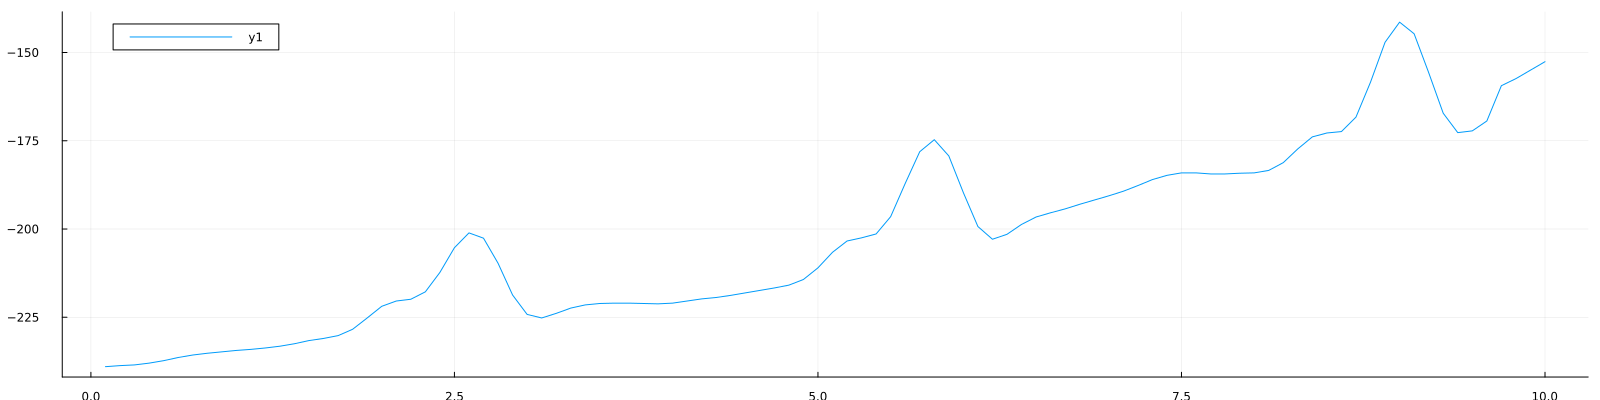

In [75]:
# using SavitzkyGolay
# using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

#sg = savitzky_golay(df.NS, 3, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.NS,size=(1600,400))
#plot!(df.Chainage, sg.y,lc=:red)

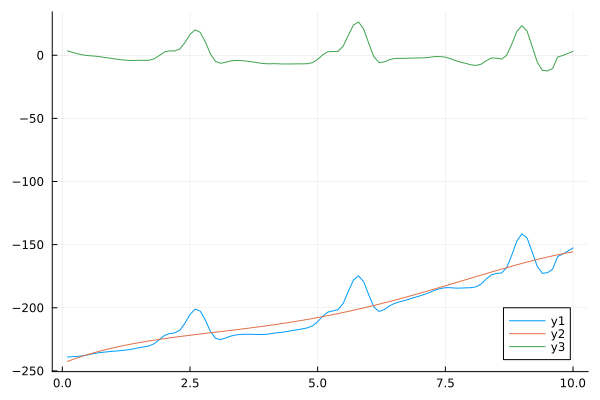

In [76]:

poly = curve_fit(Polynomial, df.Chainage, df.NS, 4)
df.basepoly = poly.(df.Chainage)

# the corrected values should be a flat plot centered on the mean by subtracting the poly from the actuals

df.corrected = df.NS - df.basepoly

plot(df.Chainage, df.NS)
plot!(df.Chainage, df.basepoly)
plot!(df.Chainage, df.corrected)
#plate_average = mean(plate.corrected)

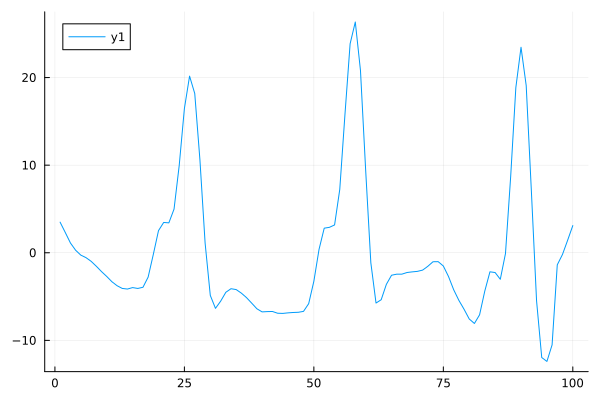

In [77]:
#plot(df.Chainage, df.corrected)
plot(df.corrected)

In [78]:
using Peaks
using DataFrames
using DataFramesMeta

In [83]:
pks = findmaxima(df.corrected) |> peakproms(; min=8)

(indices = [26, 58, 90], heights = [20.164297341650638, 26.342049458451697, 23.459243806029264], data = [3.492785910728969, 2.312671905121107, 1.1113976480097847, 0.2851318183818137, -0.2698834953962148, -0.5573324117940217, -0.9808237398132462, -1.5438947538174546, -2.1500061778774864, -2.7025472982045926  …  19.086311759415764, 7.040700382829414, -5.474862669849642, -11.957536540413912, -12.404444528054228, -10.512607718226178, -1.3789747502088403, -0.20044493221800508, 1.426188505453581, 3.1041758743723165], proms = [24.306473260273094, 33.26489463956264, 31.53143348264362])

In [80]:
pkhts = findmaxima(df.corrected) |> peakheights(; min=8)

(indices = [26, 58, 90], heights = [20.164297341650638, 26.342049458451697, 23.459243806029264], data = [3.492785910728969, 2.312671905121107, 1.1113976480097847, 0.2851318183818137, -0.2698834953962148, -0.5573324117940217, -0.9808237398132462, -1.5438947538174546, -2.1500061778774864, -2.7025472982045926  …  19.086311759415764, 7.040700382829414, -5.474862669849642, -11.957536540413912, -12.404444528054228, -10.512607718226178, -1.3789747502088403, -0.20044493221800508, 1.426188505453581, 3.1041758743723165])

In [81]:
println("first plate height ", pkhts.heights[1])
println("second plate height ", pkhts.heights[2])
println("third plate height ", pkhts.heights[3])

first plate height 20.164297341650638
second plate height 26.342049458451697
third plate height 23.459243806029264


In [82]:
# plate_count =0

# for i in 1:nrow(lp_df)
#     if plate_count < 3
#         lower = lp_df[i,:heights]
#         higher = lp_df[i+1,:heights]
        
#         if ((higher - lower) > 5) 
#             plate_count = plate_count +1
#             println("plate ", plate_count, " height is ", higher-lower)             
#         end
#         #
#     end
# end